<a href="https://colab.research.google.com/github/sage959/Project_ElevateLabs/blob/main/Carbon_emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
df = pd.read_csv("emissions.csv")

In [3]:
df = df.rename(columns={
    "Entity": "country",
    "Year":   "year",
    "electricity and heat": "energy",
    "transport":            "transport",
    "industry":             "industry"
})

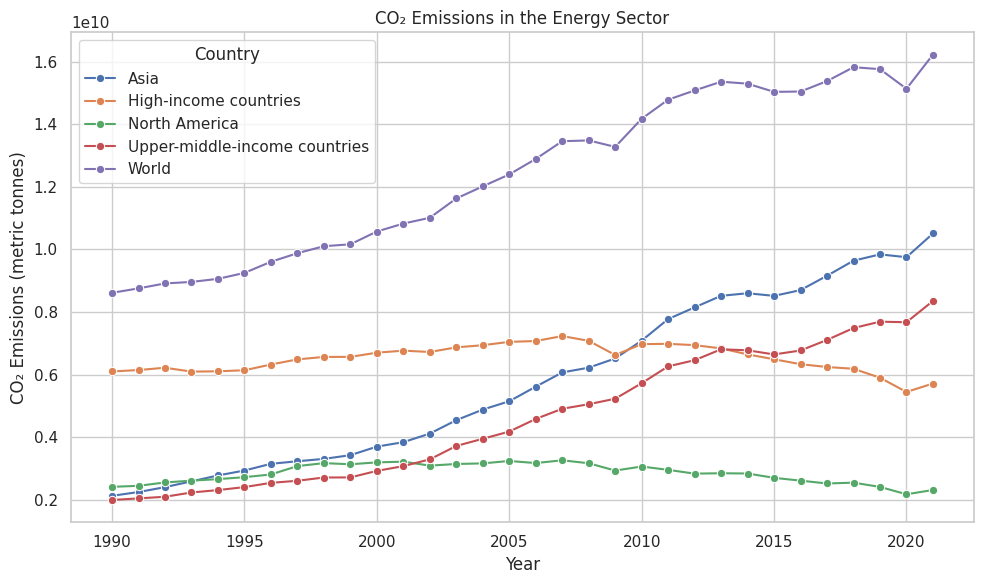

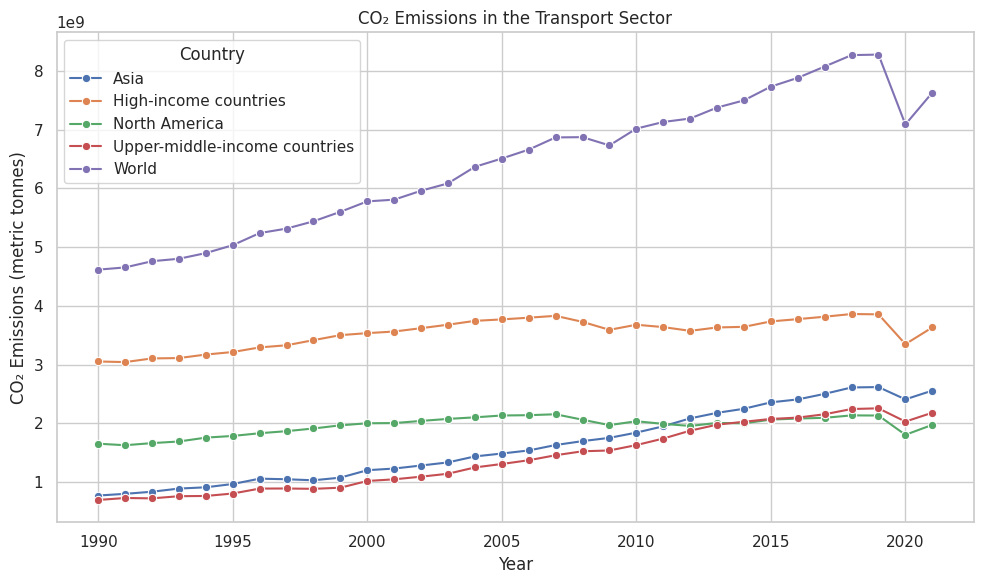

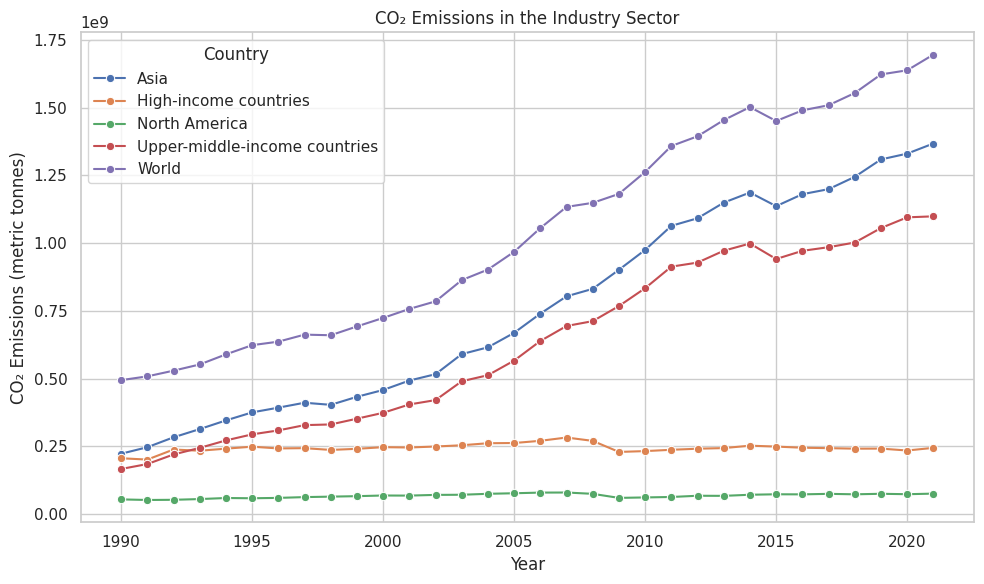

In [4]:
#filter the three sectors
sectors = ["energy", "transport", "industry"]
df_long = df[["country", "year"] + sectors].melt(
    id_vars=["country", "year"],
    value_vars=sectors,
    var_name="sector",
    value_name="co2"
)
#top5 emitting countries
top_countries = (
    df_long.groupby("country")["co2"]
           .sum()
           .nlargest(5)
           .index
           .tolist()
)
df_top = df_long[df_long["country"].isin(top_countries)]
for sector in sectors:
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=df_top[df_top["sector"] == sector],
        x="year", y="co2",
        hue="country", marker="o"
    )
    plt.title(f"CO₂ Emissions in the {sector.title()} Sector")
    plt.xlabel("Year")
    plt.ylabel("CO₂ Emissions (metric tonnes)")
    plt.legend(title="Country")
    plt.tight_layout()
    plt.show()

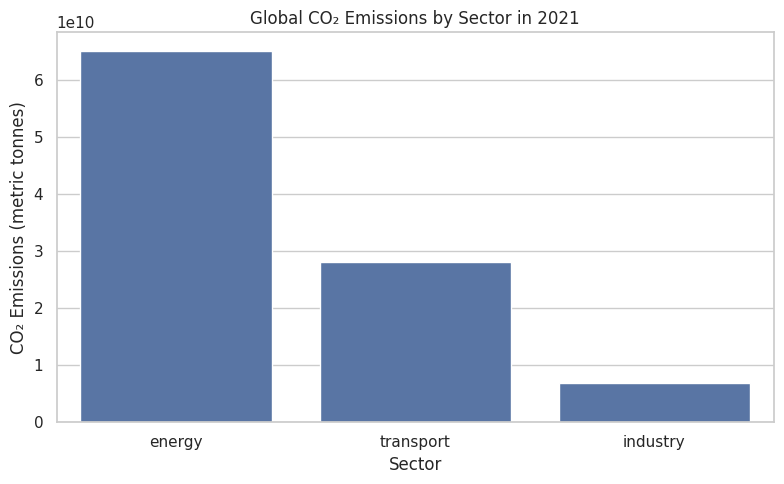

In [5]:
#sectoral share in the most recent year
latest_year = df_long["year"].max()
df_latest = df_long[df_long["year"] == latest_year]

plt.figure(figsize=(8, 5))
sns.barplot(
    x="sector", y="co2",
    data=df_latest.groupby("sector")["co2"]
                    .sum()
                    .reset_index()
                    .sort_values("sector", key=lambda x: x.map({s:i for i,s in enumerate(sectors)}))
)
plt.title(f"Global CO₂ Emissions by Sector in {latest_year}")
plt.xlabel("Sector")
plt.ylabel("CO₂ Emissions (metric tonnes)")
plt.tight_layout()
plt.show()


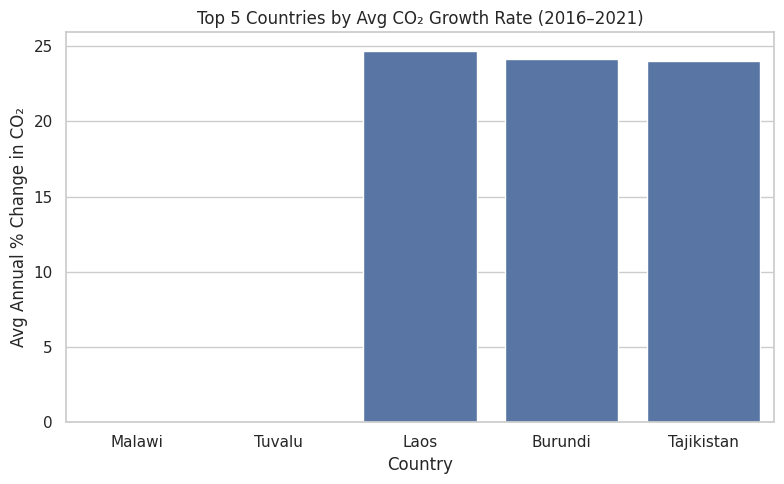

In [6]:
#addtional improvised elements
#Calculate growth rates
df_growth = df_long.sort_values(["country", "sector", "year"]).copy()
df_growth['pct_change'] = (
    df_growth
    .groupby(['country', 'sector'])['co2']
    .pct_change()
    .mul(100)
)
latest_year = df_growth['year'].max()
recent = df_growth[df_growth['year'] >= (latest_year - 5)]

avg_growth = (
    recent
    .groupby("country")["pct_change"]
    .mean()
    .nlargest(5)
)
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_growth.index, y=avg_growth.values)
plt.title(f"Top 5 Countries by Avg CO₂ Growth Rate ({latest_year - 5}–{latest_year})")
plt.xlabel("Country")
plt.ylabel("Avg Annual % Change in CO₂")
plt.tight_layout()
plt.show()

In [7]:
#anomaly detection (2 jumps of standard deviation is considered as anomaly)
import numpy as np
def flag_anomalies(group):
    z = (group.co2 - group.co2.mean()) / group.co2.std()
    return group.assign(anomaly = np.abs(z) > 2)

df_anom = (
    df_long
    .groupby(["country","sector"], group_keys=False)
    .apply(flag_anomalies)
)

print(df_anom[df_anom.anomaly])

           country  year    sector         co2  anomaly
0      Afghanistan  1990    energy    320000.0     True
1      Afghanistan  1991    energy    300000.0     True
64         Albania  1990    energy    730000.0     True
185         Angola  2015    energy   6210000.0     True
256        Armenia  1990    energy   6100000.0     True
...            ...   ...       ...         ...      ...
19550      Vietnam  2020  industry  60070000.0     True
19551      Vietnam  2021  industry  62070000.0     True
19607        Yemen  2013  industry   1150000.0     True
19608        Yemen  2014  industry   1110000.0     True
19646       Zambia  2020  industry   1080000.0     True

[515 rows x 5 columns]


/tmp/ipython-input-7-919136955.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flag_anomalies)


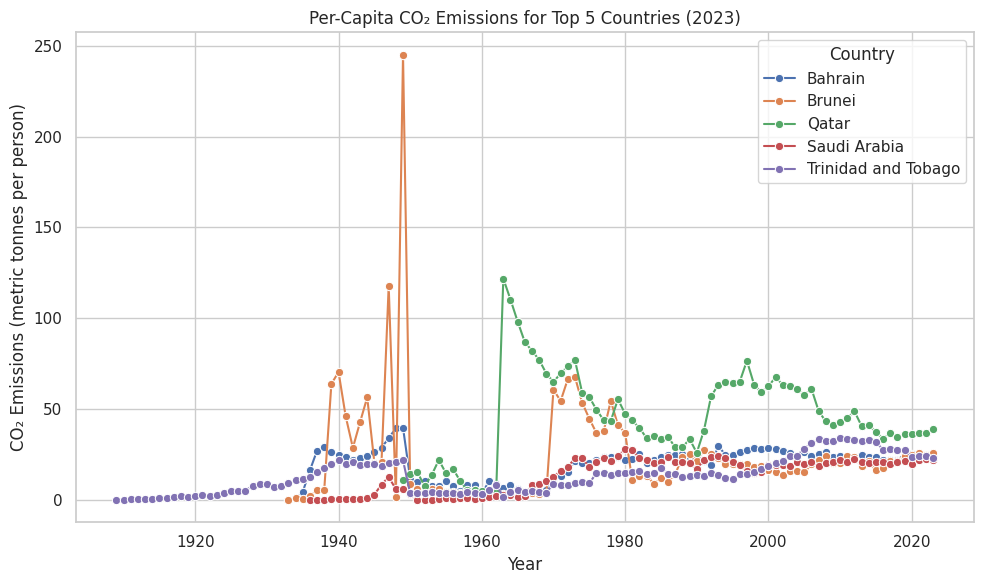

In [8]:
#per-capita emissions
df_pc = pd.read_csv("emissions-per-capita.csv")
df_pc = df_pc.rename(columns={
    "Entity": "country",
    "Year": "year",
    "Annual CO₂ emissions (per capita)": "co2_per_capita"
})

#top 5 per-capita emitters rescently
latest_year = df_pc["year"].max()
df_latest = df_pc[df_pc["year"] == latest_year]
top5_countries = (
    df_latest
    .nlargest(5, "co2_per_capita")["country"]
    .tolist()
)
#per-capita emissions for top 5 countries
df_top5 = df_pc[df_pc["country"].isin(top5_countries)]

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_top5,
    x="year",
    y="co2_per_capita",
    hue="country",
    marker="o"
)
plt.title(f"Per-Capita CO₂ Emissions for Top 5 Countries ({latest_year})")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (metric tonnes per person)")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

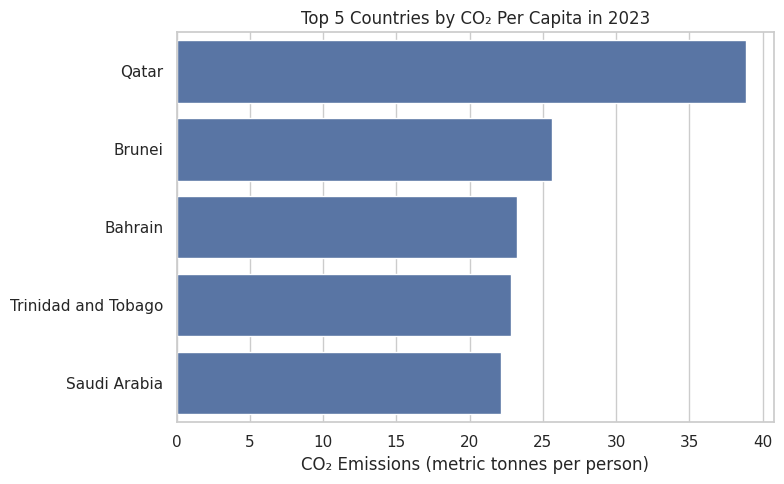

In [9]:
#bar chart:top 5 per-capita emitters
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_latest[df_latest["country"].isin(top5_countries)],
    x="co2_per_capita",
    y="country",
    order=top5_countries
)
plt.title(f"Top 5 Countries by CO₂ Per Capita in {latest_year}")
plt.xlabel("CO₂ Emissions (metric tonnes per person)")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [10]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.1 MB/s eta 0:00:00


2025-06-25 07:36:12.021 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-06-25 07:36:12.026 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-06-25 07:36:12.028 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 07:36:12.171 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-25 07:36:12.179 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 07:36:12.180 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 07:36:12.182 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 07:36:12.297 Thread 'MainThread': missin

DeltaGenerator()

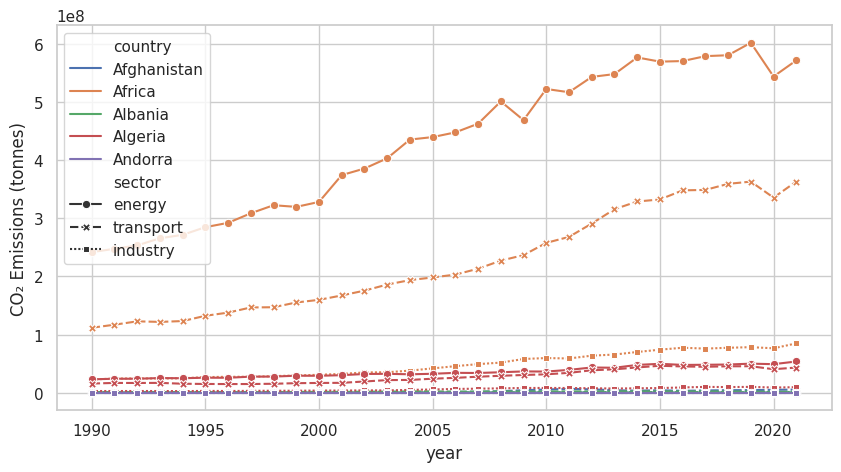

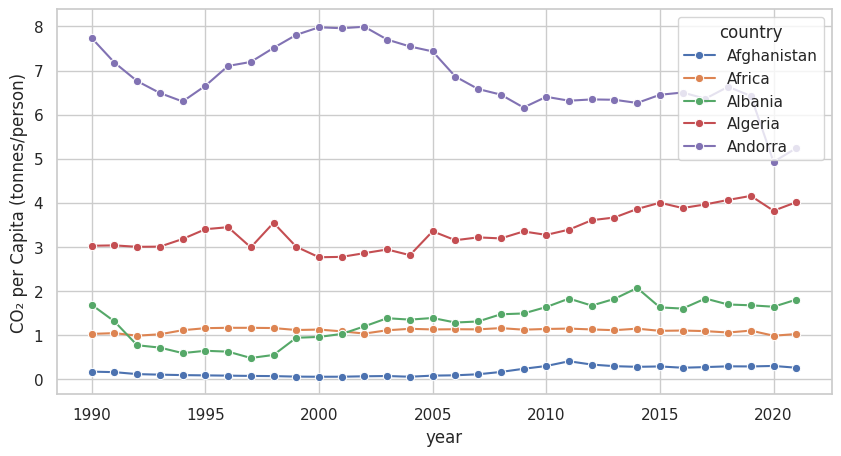

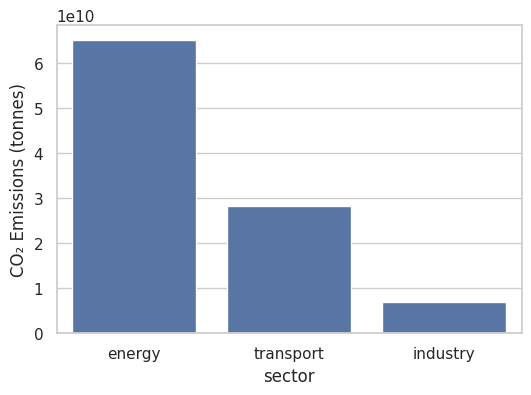

In [11]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# ——— Load & Prep ———
@st.cache_data
def load_data():
    df = pd.read_csv("emissions.csv") \
           .rename(columns={
               "Entity":"country", "Year":"year",
               "electricity and heat":"energy",
               "transport":"transport","industry":"industry"
           })
    sectors = ["energy","transport","industry"]
    df_long = df[["country","year"]+sectors].melt(
        id_vars=["country","year"],
        value_vars=sectors,
        var_name="sector",
        value_name="co2"
    )
    pop = pd.read_csv("emissions-per-capita.csv") \
            .rename(columns={
                "Entity":"country","Year":"year",
                "Annual CO₂ emissions (per capita)":"co2_pc"
            })
    return df_long, pop

df_long, df_pc = load_data()

# ——— Sidebar Controls ———
st.sidebar.title("Filters")
years      = sorted(df_long["year"].unique())
countries  = sorted(df_long["country"].unique())

sel_year    = st.sidebar.slider("Year", min_value=years[0], max_value=years[-1], value=(years[0], years[-1]))
sel_countries = st.sidebar.multiselect("Countries", countries, default=countries[:5])
sel_sector  = st.sidebar.multiselect("Sectors", ["energy","transport","industry"], default=["energy","transport","industry"])

# ——— Main Title ———
st.title("🌍 Global CO₂ Emissions Dashboard")

# ——— Section 1: Absolute Emissions ———
st.header("Absolute Emissions by Sector")
mask = (
    (df_long.year.between(sel_year[0], sel_year[1])) &
    (df_long.country.isin(sel_countries)) &
    (df_long.sector.isin(sel_sector))
)
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(
    data=df_long[mask],
    x="year", y="co2", hue="country", style="sector", markers=True, ax=ax
)
ax.set_ylabel("CO₂ Emissions (tonnes)")
st.pyplot(fig)

# ——— Section 2: Per-Capita Emissions ———
st.header("Per-Capita Emissions")
# merge absolute & per-capita on country/year
df_merge = pd.merge(
    df_pc, df_long.groupby(["country","year"])["co2"].sum().reset_index(),
    on=["country","year"], how="inner"
).rename(columns={"co2":"total_co2"})
mask_pc = (
    df_merge.year.between(sel_year[0], sel_year[1]) &
    df_merge.country.isin(sel_countries)
)
fig2, ax2 = plt.subplots(figsize=(10,5))
sns.lineplot(
    data=df_merge[mask_pc],
    x="year", y="co2_pc", hue="country", ax=ax2, marker="o"
)
ax2.set_ylabel("CO₂ per Capita (tonnes/person)")
st.pyplot(fig2)

# ——— Section 3: Latest-Year Breakdown ———
st.header(f"Sector Breakdown in {sel_year[1]}")
df_latest = df_long[df_long.year == sel_year[1]]
breakdown = df_latest.groupby("sector")["co2"].sum().reindex(sel_sector)
fig3, ax3 = plt.subplots(figsize=(6,4))
sns.barplot(x=breakdown.index, y=breakdown.values, ax=ax3)
ax3.set_ylabel("CO₂ Emissions (tonnes)")
st.pyplot(fig3)
